### 내 풀이

- https://programmers.co.kr/learn/courses/30/lessons/42626

In [12]:
def solution(scoville, K):
    """
    섞은 음식의 스코빌 = 가장 맵지 않은 + (두번째로 맵지 않은) * 2
    모든 음식의 스코빌 지수가 K 이상이 될때 멈춤.
    이때 섞어야 하는 최소 횟수를 리턴하라.
    
    scoville = [1,2,3,9,10,12] # 크기가 100만까지 됨. -> 효율성 무조건 고려해야함.
    K = 7 # 리스트 내의 최소값이 7 이상이어야함. 
    수식을 사용해서 만들수 없는 경우, return -1. 만들수 없는 경우가 무엇일까? 전부 섞어버렸는데 K미만으로 나온 경우겠네.
    
    # 리스트를 MinHeap으로 만들면, 루트 키 값만 비교하면 K에 대해서 처리가 가능함.
    # 노드에 대해서 remove 후에 다시 insert하는 작업이 필요함.
    ## 파이썬 heapq 모듈을 사용해보자.
    """
    
    #1. 인풋 값을 힙 자료형으로 변형
    import heapq 
    heapq.heapify(scoville) # 무조건 최소힙으로 만듬. O(N)
    print(scoville)
    
    #2. 음식 섞기
    count = 0
    while (len(scoville) > 1): # heap 원소가 1이하일 경우에는 섞을수도 없다.
        
        smallest = heapq.heappop(scoville)
        second_smallest = heapq.heappop(scoville)
        mixed = smallest + second_smallest * 2
        count += 1
        print(f"섞인 음식 지수 : {mixed}, {count}")
        
        #3. 새로운 음식을 힙에 insert
        heapq.heappush(scoville, mixed)
        
        #4. 제일 작은 값과 K를 비교해야함.
        if scoville[0] >= K:
            print(f"완성된 heap : {scoville}")
            return count
        
    #5. heap의 len이 1 이하일 경우, return 값을 -1로 조정한다.
    ## 인풋으로 주어진 list의 최소 길이가 2이므로 반드시 1번은 섞게 되어있다.
    return -1
            

In [13]:
scoville = [1, 2, 3, 9, 10, 12]
K = 7
solution(scoville, K)

[1, 2, 3, 9, 10, 12]
섞인 음식 지수 : 5, 1
섞인 음식 지수 : 13, 2
완성된 heap : [9, 12, 10, 13]


2

### 제출

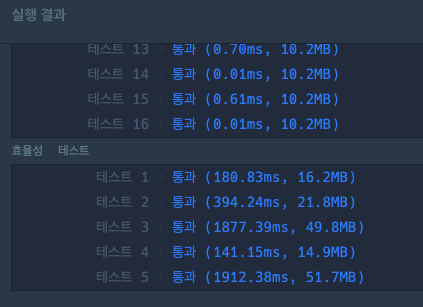

In [14]:
def solution(scoville, K):
    
    #1. 인풋 값을 힙 자료형으로 변형
    import heapq 
    heapq.heapify(scoville) # 무조건 최소힙으로 만듬. O(N)
    
    #2. 음식 섞기
    count = 0
    while (len(scoville) > 1): # heap 원소가 1이하일 경우에는 섞을수도 없다.
        
        smallest = heapq.heappop(scoville)
        second_smallest = heapq.heappop(scoville)
        mixed = smallest + second_smallest * 2
        count += 1
        
        #3. 새로운 음식을 힙에 insert
        heapq.heappush(scoville, mixed)
        
        #4. 제일 작은 값과 K를 비교해야함.
        if scoville[0] >= K:
            return count
        
    #5. heap의 len이 1 이하일 경우, return 값을 -1로 조정한다.
    ## 인풋으로 주어진 list의 최소 길이가 2이므로 반드시 1번은 섞게 되어있다.
    return -1

In [15]:
scoville = [1, 2, 3, 9, 10, 12]
K = 7
solution(scoville, K)

2

### 생각보다 비효율적인 결과. 어디서 효율을 찾을까?
- 아마 mixed를 계산하고 나서 heap에 넣고 내부에서 정렬을 수행하는데 이게 O(logN)이었던거같음.

In [19]:
# 인풋 값이 정렬되어 있는 상태인가?
# sort를 쓰면 O(NlogN)이었던 것 같은데.
# heap sort의 경우에도 전체 원소의 갯수가 N개이고, 트리의 depth 최대가 logN이라서 NlogN임. 힙을 재정비하는데 드는 시간이 logN
## 그러면 정렬은 무조건 해야하는거고 mixed를 찾아서 넣는 곳에서 문제가?
### 으악 모르겟다...

def solution(scoville, K):
    
    #1. 정렬 수행 (NlogN)
    scoville = sorted(scoville)
    #print(scoville)
    
    #2. queue에 넣음
    from collections import deque
    scoville = deque(scoville)
    #print(scoville)
    
    #3. loop
    count = 0
    _queue = deque()
    while (len(scoville) > 1): # 원소의 갯수만큼 : N
        if not _queue: # _queue가 비어있는 경우
            smallest = scoville.popleft()
            second_smallest = scoville.popleft()
        else:
            # mixed queue의 첫번째 값과, 원래 scoville에 들어있는 값 중 두번째 값과 비교한다.
            # indexing의 경우 전부 O(1)이니까 괜찮을듯?
            ## scoville[0], scoville[1], 
            _list = sorted([])
            
            
        mixed = smallest + second_smallest * 2
        count += 1
        
        #4. mixed를 또 다른 큐에 저장해둠
        _queue.append(mixed)
        
        

    return 0

In [20]:
scoville = [1, 2, 3, 9, 10, 12]
K = 7
solution(scoville, K)

deque([1, 2, 3, 9, 10, 12])


0